#Dataset used https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling

Centroid List:  [[0.305, 0.11], [0.258, 0.33]]


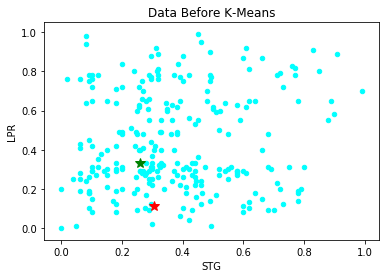

In [155]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wc_raw = pd.read_csv("data_user_modeling.csv")
wc_final = wc_raw.drop(['STR','SCG','PEG'],axis=1)
#print(wc_raw.head())
centroidList = []
numClusters = 2
#print(numClusters)
sample = wc_final.sample(n=numClusters)
#print(sample)
for i in range(numClusters):
    centroid = []
    for d in range(len(wc_final.columns.values)-1):
        centroid.append(sample.iloc[i, d])
    centroidList.append(centroid)
print("Centroid List: ",centroidList)
wc_final.plot.scatter(x='STG',y='LPR',c='cyan')
for ix, centroid in enumerate(centroidList):
    if ix == 0:
        color = 'red' 
        marker = '*'
    else:
        color = 'green' 
        marker = '*'
    plt.plot(centroid[0], centroid[1], color=color, marker=marker, ms=10)
plt.title("Data Before K-Means")
plt.xlabel("STG")
plt.ylabel("LPR")
plt.show()


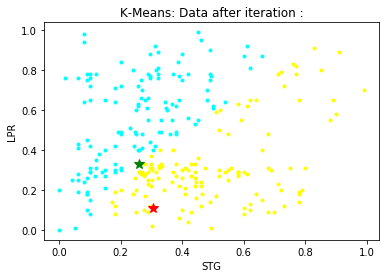

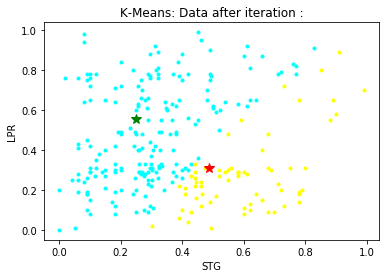

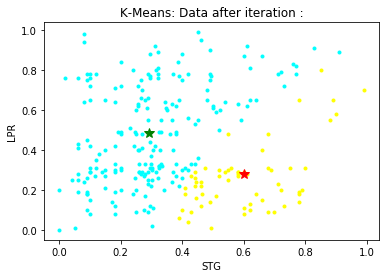

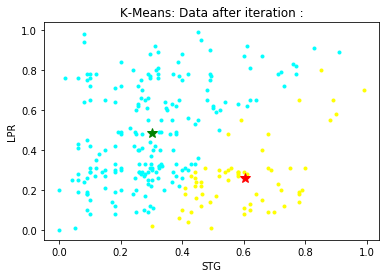

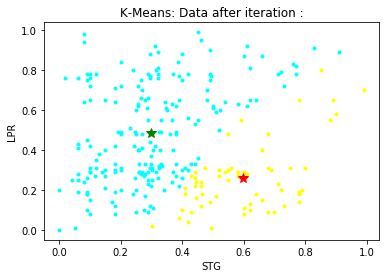

In [156]:
wc_train = wc_final[["STG","LPR"]]
#wc_train = wc_train.head(30)
#print(wc_train)
oldCent = []
numIter = 0
numCentSel = 0
centDiff = 100000
#iterate until the centroids are stable
while centDiff > .0001:
    numIter = numIter + 1
    centGrp = [[] for centroid in range(numClusters)]
    #iterate over the data
    for i, x in wc_train.iterrows():
        dist = 0
        min_dist = 100000
        numCentSel = 0
        for centNum in range(len(centroidList)):
            distance = 0
            for sampleNum in range(len(wc_train.columns.values)):
                distance = distance + (centroidList[centNum][sampleNum] - x[centNum])
                if distance < min_dist:
                    min_dist = distance
                    numCentSel = centNum
        centGrp[numCentSel].append(list(x))
        
    for i, x in enumerate(centGrp):
        if i == 0:
            color = 'yellow'
            marker = '.'
        else:
            color = 'cyan'
            marker = '.'
        for sample in x:
            plt.plot(sample[0], sample[1], color=color, marker=marker)
    #print("Iteration: " , numIter)
    for i, centroid in enumerate(centroidList):
        #print(i, centroid[i])
        if i == 0:
            color = 'red' 
            marker = '*'
        else:
            color = 'green' 
            marker = '*'
        plt.plot(centroid[0], centroid[1], color=color, marker=marker, ms=10)
    plt.title('K-Means: Data after iteration :')
    plt.xlabel("STG")
    plt.ylabel("LPR")
    plt.show()

#preserving old centroid values
    oldCent = centroidList
    centroidList = []
    for cent in centGrp:
        sumCent = [sum(x) for x in zip(*cent)]
        avgCent = [y/len(cent) for y in sumCent]
        centroidList.append(avgCent)
        #print(centroidList)
    centDiff = 0
    centFeat = len(centroidList[0])
    for feature in range(centFeat):
        for cent, prevCent in zip(centroidList, oldCent):
            centDiff = centDiff + abs(cent[feature] - prevCent[feature])

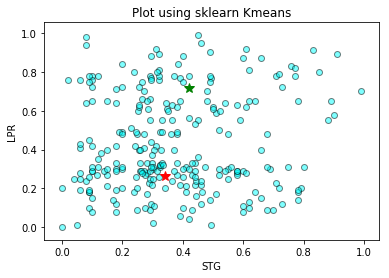

In [173]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(wc_train)
centroids = kmeans.cluster_centers_
label = kmeans.predict(wc_train)
plt.scatter(wc_train['STG'], wc_train['LPR'], color='cyan', alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    if idx == 0:
        color = 'red' 
        marker = '*'
    else:
        color = 'green'
        marker = '*'
    plt.plot(centroid[0], centroid[1], color=color, marker=marker, ms=10)
plt.title('Plot using sklearn Kmeans')
plt.xlabel("STG")
plt.ylabel("LPR")
plt.show()

The algorithm is a good choice as this is a unsupervised learning scenrio 
and to a limit the centroids seem to merge however thereafter the tuning of parameters 
doesnt help could be because of the data set chosen. The centroid chosen using sklearn are 
very different than derived by the algorithm.